<a href="https://colab.research.google.com/github/sandeepbhatia14/Melanoma-Detection-Assignment/blob/main/Sandeep_Bhatia_Melanoma_Detection_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importing Important libraries

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

**Defining the path for train and test images and load the data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_dir_train = pathlib.Path('gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/')
data_dir_test = pathlib.Path('gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


**There in total 2239 images in Training data and Total 118 in Test Data**

**Create a dataset Define some parameters for the loader:**

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split= 0.2,
    subset="training",
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split= 0.2,
    subset="validation",
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)
## Number of classes
total_classes = len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Visualize the data**

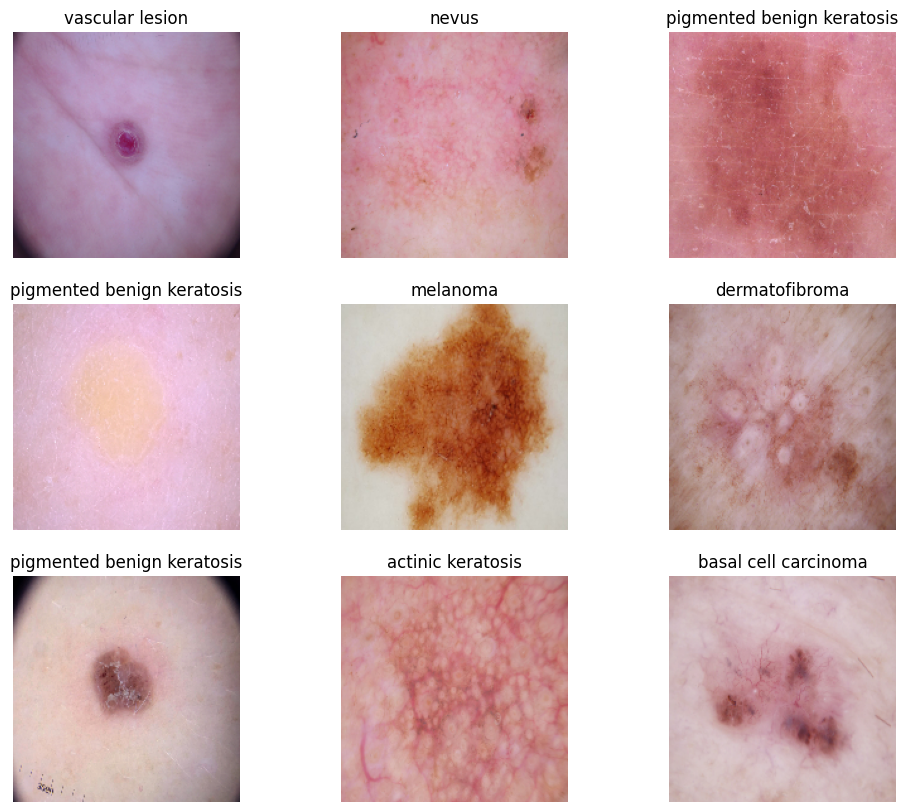

In [ ]:
fig = plt.figure(figsize=(12,10))
for images, labels in train_ds.take(1):
    for i in range(total_classes):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while raining.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Model architecture
# Building a sequential model with rescaling, and 3 conv layer and 2 dense layers with softmax as output function

model = Sequential([
    # rescaling layer
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    # 1st conv layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # 2nd conv layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # 3rd conv layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
     # maxpooling layer
  layers.MaxPooling2D(),
    # flatten
  layers.Flatten(),
    # 1st dense layer
  layers.Dense(128, activation='relu'),
    # output dense layer
  layers.Dense(total_classes,activation='softmax')
])

In [ ]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 58s 1s/step - loss: 1.9728 - accuracy: 0.2545 - val_loss: 1.7865 - val_accuracy: 0.3423
Epoch 2/20
56/56 [==============================] - 56s 994ms/step - loss: 1.6483 - accuracy: 0.4157 - val_loss: 1.4655 - val_accuracy: 0.4855
Epoch 3/20
56/56 [==============================] - 58s 1s/step - loss: 1.3668 - accuracy: 0.5279 - val_loss: 1.4122 - val_accuracy: 0.5235
Epoch 4/20
56/56 [==============================] - 56s 1s/step - loss: 1.3437 - accuracy: 0.5352 - val_loss: 1.3573 - val_accuracy: 0.5257
Epoch 5/20
56/56 [==============================] - 56s 1s/step - loss: 1.2028 - accuracy: 0.5703 - val_loss: 1.4324 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 55s 975ms/step - loss: 1.1134 - accuracy: 0.5977 - val_loss: 1.3373 - val_accuracy: 0.5369
Epoch 7/20
56/56 [==============================] - 59s 1s/step - loss: 1.0075 - accuracy: 0.6350 - val_loss: 1.5134 - val_accuracy: 0.5078
Epoch 8/20
56/

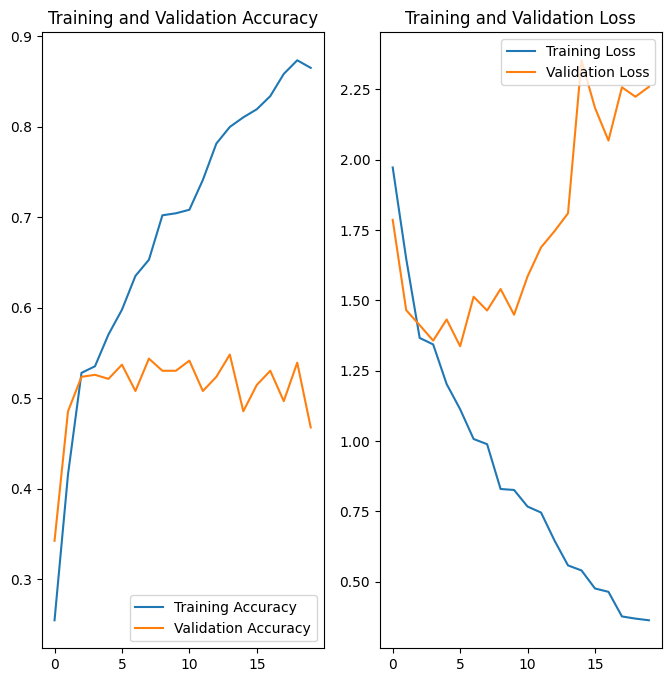

In [ ]:
## Visualize training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**The accuracy of the model for training data is 86.50%, however fovaldidation data it is 46.76. It is a clear case of overfitting.**

In [ ]:
# Model architecture
# Building a sequential model with rescaling, and 3 conv layer with dropout layers and 2 dense layers with softmax as output function

model = Sequential([
    # rescaling layer
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    # 1st conv layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # Dropout Layer
  layers.Dropout(0.25),
    # 2nd conv layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
      # maxpooling layer
  layers.MaxPooling2D(),
    # Dropout Layer
  layers.Dropout(0.25),
    # 3rd conv layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
     # maxpooling layer
  layers.MaxPooling2D(),
      # Dropout Layer
  layers.Dropout(0.50),
    # flatten
  layers.Flatten(),
    # 1st dense layer
  layers.Dense(128, activation='relu'),
    # output dense layer
  layers.Dense(total_classes,activation='softmax')
])

In [ ]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 61s 1s/step - loss: 2.1681 - accuracy: 0.2483 - val_loss: 1.9573 - val_accuracy: 0.3266
Epoch 2/20
56/56 [==============================] - 61s 1s/step - loss: 1.8206 - accuracy: 0.3376 - val_loss: 1.7617 - val_accuracy: 0.4072
Epoch 3/20
56/56 [==============================] - 63s 1s/step - loss: 1.6457 - accuracy: 0.4208 - val_loss: 1.6513 - val_accuracy: 0.4251
Epoch 4/20
56/56 [==============================] - 64s 1s/step - loss: 1.5907 - accuracy: 0.4347 - val_loss: 1.6042 - val_accuracy: 0.4452
Epoch 5/20
56/56 [==============================] - 62s 1s/step - loss: 1.5779 - accuracy: 0.4420 - val_loss: 1.5669 - val_accuracy: 0.4676
Epoch 6/20
56/56 [==============================] - 60s 1s/step - loss: 1.5097 - accuracy: 0.4548 - val_loss: 1.5419 - val_accuracy: 0.4541
Epoch 7/20
56/56 [==============================] - 62s 1s/step - loss: 1.4358 - accuracy: 0.4955 - val_loss: 1.4281 - val_accuracy: 0.5280
Epoch 8/20
56/56 [==

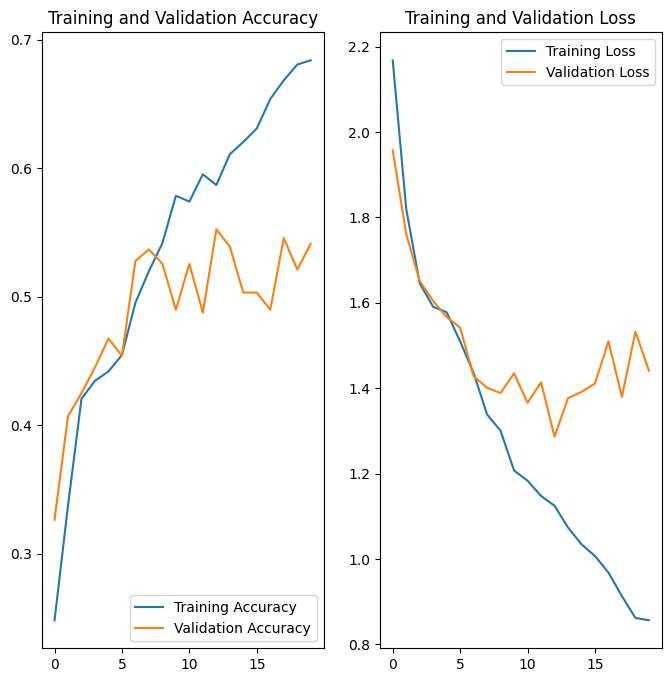

In [ ]:
## Visualize training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


**The accuracy of the model for training data reduced to 64.42%, however for valdidation data it is 54.14%. The dropouts reduced the overall training accuracy. however, the differce between training accurracy and validation accuracy is reduced.**

In [ ]:
## Rectify the class imbalance

!pip install Augmentor

In [ ]:
path_to_training_dataset="gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE8D6F560E0>: 100%|██████████| 500/500 [00:30<00:00, 16.29 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE8D6EDB550>: 100%|██████████| 500/500 [00:25<00:00, 19.98 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE8E4109270>: 100%|██████████| 500/500 [00:23<00:00, 21.46 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FE8D6E94A00>: 100%|██████████| 500/500 [01:56<00:00,  4.30 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7FE8D6F6C9A0>: 100%|██████████| 500/500 [01:28<00:00,  5.64 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE8E4109270>: 100%|██████████| 500/500 [00:24<00:00, 20.40 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE8D6F55DB0>: 100%|██████████| 500/500 [00:47<00:00, 10.58 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE8D716B7F0>: 100%|██████████| 500/500 [00:24<00:00, 20.01 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE8D716BFA0>: 100%|██████████| 500/500 [00:24<00:00, 20.21 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026984.jpg_a891c831-c526-4c4e-96bf-98d379e702b5.jpg',
 'gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030491.jpg_adb243f4-0072-4d8c-86f7-92785f758ad2.jpg',
 'gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028063.jpg_43730f2e-2b7b-4556-b874-f940d76bdf73.jpg',
 'gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025803.jpg_565a44ef-81d8-4dea-9d8b-a2c9577176d1.jpg',
 'gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_orig

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [ ]:
df2['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

In [ ]:
path_list_orig = [x for x in glob(os.path.join(data_dir_train, '*','*.jpg'))]
path_list_orig


['gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0030133.jpg',
 'gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0027580.jpg',
 'gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029915.jpg',
 'gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0027668.jpg',
 'gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0028517.jpg',
 'gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029830.jpg',
 'gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029025.jpg',
 'gdrive/My Drive/CNN_Assignment/S

In [ ]:
lesion_list_orig = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_orig

['Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',


In [ ]:
dataframe_dict = dict(zip(path_list_orig, lesion_list_orig))

In [ ]:
df_orig = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [ ]:
df_orig['Label'].value_counts()

Label
Train    2239
Name: count, dtype: int64

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
data_dir_train='gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
data_dir_train='gdrive/My Drive/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
# Model architecture
# Building a sequential model with rescaling, and 3 conv layer and 2 dense and normalization layers with softmax as output function

model = Sequential([
    # rescaling layer
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    # 1st conv layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
    # Adding batch Normalization layer
  layers.BatchNormalization(),
    # maxpooling layer
  layers.MaxPooling2D(),
    # 2nd conv layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
    # Adding batch Normalization layer
  layers.BatchNormalization(),
    # maxpooling layer
  layers.MaxPooling2D(),
    # 3rd conv layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
    # Adding batch Normalization layer
  layers.BatchNormalization(),
     # maxpooling layer
  layers.MaxPooling2D(),
    # flatten
  layers.Flatten(),
    # 1st dense layer
  layers.Dense(128, activation='relu'),
    # output dense layer
  layers.Dense(total_classes,activation='softmax')
])

In [ ]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 180, 180, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 90, 90, 32)       

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
43/43 [==============================] - 74s 2s/step - loss: 4.0804 - accuracy: 0.2376 - val_loss: 11.2445 - val_accuracy: 0.0470
Epoch 2/30
43/43 [==============================] - 77s 2s/step - loss: 1.7767 - accuracy: 0.3318 - val_loss: 19.8654 - val_accuracy: 0.0425
Epoch 3/30
43/43 [==============================] - 73s 2s/step - loss: 1.5577 - accuracy: 0.4113 - val_loss: 26.0021 - val_accuracy: 0.0582
Epoch 4/30
43/43 [==============================] - 69s 2s/step - loss: 1.4233 - accuracy: 0.4595 - val_loss: 26.5456 - val_accuracy: 0.0447
Epoch 5/30
43/43 [==============================] - 69s 2s/step - loss: 1.2907 - accuracy: 0.5115 - val_loss: 28.4650 - val_accuracy: 0.0828
Epoch 6/30
43/43 [==============================] - 68s 2s/step - loss: 1.3323 - accuracy: 0.5189 - val_loss: 23.3107 - val_accuracy: 0.1521
Epoch 7/30
43/43 [==============================] - 70s 2s/step - loss: 1.0670 - accuracy: 0.6021 - val_loss: 21.3303 - val_accuracy: 0.2081
Epoch 8/30
43

With data augmentation overall accuracy of training data increased to 97.92% , however the validatation accuracy is 65%. The model is still overfit.

In [ ]:
# Trying to add dropout layer

# Model architecture
# Building a sequential model with rescaling, and 3 conv layer and 2 dense & dropout and normalization layers with softmax as output function

model = Sequential([
    # rescaling layer
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    # 1st conv layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
    # Adding batch Normalization layer
  layers.BatchNormalization(),
    # maxpooling layer
  layers.MaxPooling2D(),
    # Dropout layer
  layers.Dropout(0.25),
    # 2nd conv layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
    # Adding batch Normalization layer
  layers.BatchNormalization(),
    # maxpooling layer
  layers.MaxPooling2D(),
    # 3rd conv layer
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
    # Adding batch Normalization layer
  layers.BatchNormalization(),
     # maxpooling layer
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
    # flatten
  layers.Flatten(),
    # 1st dense layer
  layers.Dense(128, activation='relu'),
    # output dense layer
  layers.Dense(total_classes,activation='softmax')
])

In [ ]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_3 (Bat  (None, 180, 180, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 32)       

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
43/43 [==============================] - 98s 2s/step - loss: 5.0633 - accuracy: 0.2539 - val_loss: 27.1189 - val_accuracy: 0.0872
Epoch 2/30
43/43 [==============================] - 75s 2s/step - loss: 1.7912 - accuracy: 0.3163 - val_loss: 31.3532 - val_accuracy: 0.1499
Epoch 3/30
43/43 [==============================] - 71s 2s/step - loss: 1.6564 - accuracy: 0.3578 - val_loss: 27.8658 - val_accuracy: 0.1588
Epoch 4/30
43/43 [==============================] - 71s 2s/step - loss: 1.5838 - accuracy: 0.3979 - val_loss: 19.8832 - val_accuracy: 0.0940
Epoch 5/30
43/43 [==============================] - 70s 2s/step - loss: 1.3960 - accuracy: 0.4588 - val_loss: 15.2188 - val_accuracy: 0.1969
Epoch 6/30
43/43 [==============================] - 75s 2s/step - loss: 1.3778 - accuracy: 0.4707 - val_loss: 8.7901 - val_accuracy: 0.1499
Epoch 7/30
43/43 [==============================] - 75s 2s/step - loss: 1.3652 - accuracy: 0.4967 - val_loss: 10.3356 - val_accuracy: 0.0626
Epoch 8/30
43/

No benefit of dropout layer the overall accuracy reduced.
